In [ ]:
import pandas as pd
import numpy as np

trips = pd.read_csv('data/processed/trips_con_ventanas.csv')

trips

C:\Users\Matteo\AppData\Local\Temp\ipykernel_37284\484300646.py:4: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  trips = pd.read_csv('data/processed/trips_con_ventanas.csv')


In [2]:
import gc
gc.collect()

0

In [4]:
print(trips.columns)

Index(['id_recorrido', 'duracion_recorrido', 'id_estacion_origen',
       'nombre_estacion_origen', 'direccion_estacion_origen',
       'long_estacion_origen', 'lat_estacion_origen', 'id_estacion_destino',
       'nombre_estacion_destino', 'direccion_estacion_destino',
       'long_estacion_destino', 'lat_estacion_destino', 'id_usuario',
       'modelo_bicicleta', 'genero', 'fecha_origen_recorrido',
       'fecha_destino_recorrido', 'edad_usuario', 'fecha_alta', 'hora_alta',
       'ventana_despacho', 'ventana_arribo'],
      dtype='object')


In [5]:
# Exploremos la estructura del dataset
print("Forma del dataset:", trips.shape)
print("\nPrimeras 5 filas:")
print(trips.head())
print("\nTipos de datos:")
print(trips.dtypes)
print("\nValores únicos en algunas columnas clave:")
print("Generos:", trips['genero'].unique())
print("Modelos de bicicleta:", trips['modelo_bicicleta'].unique())
print("\nRango de fechas:")
print("Fecha origen min:", trips['fecha_origen_recorrido'].min())
print("Fecha origen max:", trips['fecha_origen_recorrido'].max())


Forma del dataset: (12785807, 22)

Primeras 5 filas:
   id_recorrido  duracion_recorrido  id_estacion_origen  \
0       7210548                1582                  27   
1       7199093                 204                 151   
2       7196805                1790                 111   
3       7203598               10688                 285   
4       7200335                 673                 171   

    nombre_estacion_origen            direccion_estacion_origen  \
0         027 - Montevideo             Cordoba Av. & Montevideo   
1         151 - AIME PAINÉ     Villaflor, Azucena & Paine, Aime   
2     111 - MACACHA GUEMES                   Machaca Guemes 350   
3  400 - Reserva Ecologica  Achaval Rodriguez, T., Dr. Av. 1520   
4            171 - Pasteur                          519 Pasteur   

   long_estacion_origen  lat_estacion_origen  id_estacion_destino  \
0            -58.390087           -34.599068                  3.0   
1            -58.361286           -34.611816       

In [6]:
# Veamos las ventanas que ya tenemos
print("Ejemplo de ventanas:")
print("Ventana despacho:", trips['ventana_despacho'].head(10).tolist())
print("Ventana arribo:", trips['ventana_arribo'].head(10).tolist())

# Veamos el formato de las fechas
print("\nEjemplos de fechas:")
print("Fecha origen:", trips['fecha_origen_recorrido'].head(3).tolist())
print("Fecha destino:", trips['fecha_destino_recorrido'].head(3).tolist())
print("Fecha alta:", trips['fecha_alta'].head(3).tolist())


Ejemplo de ventanas:
Ventana despacho: ['2020-01-24 22:00:00', '2020-01-24 07:30:00', '2020-01-24 00:30:00', '2020-01-24 13:00:00', '2020-01-24 09:00:00', '2020-01-24 13:30:00', '2020-01-24 13:30:00', '2020-01-24 06:30:00', '2020-01-24 15:30:00', '2020-01-24 09:30:00']
Ventana arribo: ['2020-01-24 22:00:00', '2020-01-24 07:00:00', '2020-01-24 00:30:00', '2020-01-24 15:30:00', '2020-01-24 08:30:00', '2020-01-24 13:00:00', '2020-01-24 14:00:00', '2020-01-24 06:00:00', '2020-01-24 16:00:00', '2020-01-24 09:00:00']

Ejemplos de fechas:
Fecha origen: ['2020-01-24 21:54:39', '2020-01-24 07:04:19', '2020-01-24 00:15:17']
Fecha destino: ['2020-01-24 22:21:01', '2020-01-24 07:07:43', '2020-01-24 00:45:07']
Fecha alta: [nan, nan, nan]


In [7]:
# Importar y ejecutar el feature engineering
from feature_engineering_bicis import BikeDataFeatureEngineer

# Crear instancia del procesador
feature_engineer = BikeDataFeatureEngineer()

# Configurar rutas
input_path = 'data/processed/trips_con_ventanas.csv'
output_path = 'data/processed/trips_features_engineered.csv'

print("Iniciando transformación del dataset...")
print(f"Archivo de entrada: {input_path}")
print(f"Archivo de salida: {output_path}")


Iniciando transformación del dataset...
Archivo de entrada: data/processed/trips_con_ventanas.csv
Archivo de salida: data/processed/trips_features_engineered.csv


In [8]:
# Ejecutar la transformación completa
df_transformed = feature_engineer.transform_dataset(input_path, output_path)


=== Iniciando proceso de Feature Engineering ===
Cargando dataset...
Dataset cargado: (12785807, 22)
Preparando features de fecha y hora...
Creando features de género...
Creando features de usuario...
Creando clusters de estaciones y barrios...
Calculando estaciones cercanas...
Creando ventanas de tiempo...
Creando features de lag...
Calculando conteos de arribos y salidas...
Creando lags de arribos y salidas...
Seleccionando features finales...
Guardando dataset transformado en: data/processed/trips_features_engineered.csv
=== Proceso completado ===
Dataset final: (12785807, 84)
Columnas: 84


In [9]:
# Verificar el resultado
print("=== RESULTADO DE LA TRANSFORMACIÓN ===")
print(f"Forma del dataset transformado: {df_transformed.shape}")
print(f"\nPrimeras columnas:")
print(df_transformed.columns.tolist()[:20])
print(f"\nPrimera fila de ejemplo:")
print(df_transformed.iloc[0])

# Obtener features de entrenamiento
training_features = feature_engineer.get_training_features()
print(f"\n=== FEATURES PARA ENTRENAMIENTO ===")
print(f"Total de features: {len(training_features)}")
print("Features:")
for i, feature in enumerate(training_features[:10]):  # Mostrar primeras 10
    print(f"  {i+1:2d}. {feature}")
print("  ... (y más)")


=== RESULTADO DE LA TRANSFORMACIÓN ===
Forma del dataset transformado: (12785807, 84)

Primeras columnas:
['id_recorrido', 'duracion_recorrido', 'id_estacion_origen', 'id_estacion_destino', 'id_usuario', 'modelo_bicicleta', 'barrio_origen', 'barrio_destino', 'dia_semana', 'es_finde', 'estacion_del_anio', 'edad_usuario', 'año_alta', 'mes_alta', 'genero_FEMALE', 'genero_MALE', 'genero_OTHER', 'usuario_registrado', 'zona_destino_cluster', 'zona_origen_cluster']

Primera fila de ejemplo:
id_recorrido            6878285
duracion_recorrido          586
id_estacion_origen          448
id_estacion_destino         2.0
id_usuario             173669.0
                         ...   
N_SALIDAS_LAG4              0.0
N_ARRIBOS_LAG5              0.0
N_SALIDAS_LAG5              0.0
N_ARRIBOS_LAG6              0.0
N_SALIDAS_LAG6              0.0
Name: 0, Length: 84, dtype: object

=== FEATURES PARA ENTRENAMIENTO ===
Total de features: 68
Features:
   1. id_estacion_origen
   2. id_usuario
   3. modelo_

In [10]:
# OPCIONAL: Entrenar el modelo XGBoost (descomentar si quieres entrenar ahora)
# from train_xgboost_bicis import XGBoostBikePredictor

# # Crear predictor con GPU habilitada
# predictor = XGBoostBikePredictor(use_gpu=True)

# # Cargar y preparar datos
# df_model = predictor.load_data('data/processed/trips_features_engineered.csv')
# X, y = predictor.prepare_data(df_model)
# X_train, X_test, y_train, y_test = predictor.split_data(X, y)

# print(f"\n=== LISTO PARA ENTRENAR ===")
# print(f"Dataset para entrenamiento: {X_train.shape}")
# print(f"Features: {len(predictor.training_features)}")
# print("Para entrenar el modelo, ejecuta las siguientes líneas:")
# print("model = predictor.train_model(X_train, X_test, y_train, y_test)")
# print("metrics, y_pred = predictor.evaluate_model(X_test, y_test)")

print("🎯 Dataset transformado exitosamente!")
print("📝 Archivos creados:")
print("  - feature_engineering_bicis.py: Script de transformación")
print("  - train_xgboost_bicis.py: Script de entrenamiento XGBoost")
print("  - data/processed/trips_features_engineered.csv: Dataset transformado")
print("\n✅ ¡Todo listo para entrenar el modelo con XGBoost + GPU!")


🎯 Dataset transformado exitosamente!
📝 Archivos creados:
  - feature_engineering_bicis.py: Script de transformación
  - train_xgboost_bicis.py: Script de entrenamiento XGBoost
  - data/processed/trips_features_engineered.csv: Dataset transformado

✅ ¡Todo listo para entrenar el modelo con XGBoost + GPU!


In [11]:
# ¡ENTRENAR EL MODELO XGBOOST! 🚀
from train_xgboost_bicis import XGBoostBikePredictor

print("=== INICIANDO ENTRENAMIENTO DEL MODELO ===")
print("🚀 Configurando XGBoost con GPU...")

# Crear predictor con GPU habilitada
predictor = XGBoostBikePredictor(use_gpu=True)


=== INICIANDO ENTRENAMIENTO DEL MODELO ===
🚀 Configurando XGBoost con GPU...


In [13]:
# ⚠️ REGENERAR DATASET CON CORRECCIONES ⚠️
print("🔧 Regenerando dataset con variables categóricas corregidas...")

# Reimportar el feature engineer actualizado
import importlib
import feature_engineering_bicis
importlib.reload(feature_engineering_bicis)
from feature_engineering_bicis import BikeDataFeatureEngineer

# Crear nueva instancia
feature_engineer_fixed = BikeDataFeatureEngineer()

# Regenerar dataset corregido
print("📊 Ejecutando feature engineering corregido...")
df_transformed_fixed = feature_engineer_fixed.transform_dataset(
    'data/processed/trips_con_ventanas.csv',
    'data/processed/trips_features_engineered_fixed.csv'
)

# Ahora cargar y preparar datos con el dataset corregido
print("\n📊 Cargando dataset corregido...")
df_model = predictor.load_data('data/processed/trips_features_engineered_fixed.csv')

print("🔧 Preparando datos para entrenamiento...")
X, y = predictor.prepare_data(df_model)

print("✂️ Dividiendo en train/test...")
X_train, X_test, y_train, y_test = predictor.split_data(X, y)

print(f"\n=== DATOS LISTOS ===")
print(f"📈 Dataset completo: {X.shape}")
print(f"🏋️ Entrenamiento: {X_train.shape}")
print(f"🧪 Prueba: {X_test.shape}")
print(f"🎯 Target: {y.name} (rango: {y.min():.0f} - {y.max():.0f})")


🔧 Regenerando dataset con variables categóricas corregidas...
📊 Ejecutando feature engineering corregido...
=== Iniciando proceso de Feature Engineering ===
Cargando dataset...
Dataset cargado: (12785807, 22)
Preparando features de fecha y hora...
Creando features de género...
Creando features de usuario...
Creando clusters de estaciones y barrios...
Calculando estaciones cercanas...
Creando ventanas de tiempo...
Creando features de lag...
Calculando conteos de arribos y salidas...
Creando lags de arribos y salidas...
Seleccionando features finales...
Guardando dataset transformado en: data/processed/trips_features_engineered_fixed.csv
=== Proceso completado ===
Dataset final: (12785807, 84)
Columnas: 84

📊 Cargando dataset corregido...
Cargando dataset transformado...
Dataset cargado: (12785807, 84)
🔧 Preparando datos para entrenamiento...
Preparando datos para entrenamiento...
Datos preparados: X=(12785807, 68), y=(12785807,)
Target stats: min=0.0, max=36.0, mean=2.75
✂️ Dividiendo e

In [14]:
# ¡ENTRENAR EL MODELO! 💪
print("=== 🚀 ENTRENANDO XGBOOST CON GPU 🚀 ===")
print("⏰ Esto puede tomar varios minutos dependiendo del tamaño del dataset...")
print("🔥 Usando GPU para acelerar el entrenamiento")

# Entrenar el modelo
model = predictor.train_model(X_train, X_test, y_train, y_test)


=== 🚀 ENTRENANDO XGBOOST CON GPU 🚀 ===
⏰ Esto puede tomar varios minutos dependiendo del tamaño del dataset...
🔥 Usando GPU para acelerar el entrenamiento
=== ENTRENANDO MODELO XGBOOST ===
🚀 GPU habilitada para XGBoost
Iniciando entrenamiento...
[0]	validation_0-rmse:2.80036	validation_1-rmse:2.79926
[100]	validation_0-rmse:0.86093	validation_1-rmse:0.86260
[200]	validation_0-rmse:0.84806	validation_1-rmse:0.85025
[300]	validation_0-rmse:0.84118	validation_1-rmse:0.84402
[400]	validation_0-rmse:0.83680	validation_1-rmse:0.84030
[500]	validation_0-rmse:0.83386	validation_1-rmse:0.83806
[600]	validation_0-rmse:0.83121	validation_1-rmse:0.83605
[700]	validation_0-rmse:0.82897	validation_1-rmse:0.83440
[800]	validation_0-rmse:0.82729	validation_1-rmse:0.83346
[900]	validation_0-rmse:0.82555	validation_1-rmse:0.83240
[999]	validation_0-rmse:0.82423	validation_1-rmse:0.83176
✅ Entrenamiento completado en: 0:01:45.838716


In [15]:
# Evaluar el modelo entrenado
print("=== 📊 EVALUANDO MODELO ===")
metrics, y_pred = predictor.evaluate_model(X_test, y_test)

print(f"\n✅ ¡ENTRENAMIENTO COMPLETADO!")
print(f"📈 Métricas del modelo:")
for metric, value in metrics.items():
    print(f"   {metric}: {value:.4f}")

# Guardar el modelo
predictor.save_model()


=== 📊 EVALUANDO MODELO ===
=== EVALUANDO MODELO ===
MAE:  0.4698
MSE:  0.6918
RMSE: 0.8318
R²:   0.8435

✅ ¡ENTRENAMIENTO COMPLETADO!
📈 Métricas del modelo:
   MAE: 0.4698
   MSE: 0.6918
   RMSE: 0.8318
   R2: 0.8435
Guardando modelo...
✅ Modelo guardado en: models/xgboost_bicis_model.pkl
✅ Metadatos guardados en: models/xgboost_bicis_metadata.pkl


=== 📊 ANÁLISIS DE RESULTADOS ===
🔍 Analizando importancia de features...


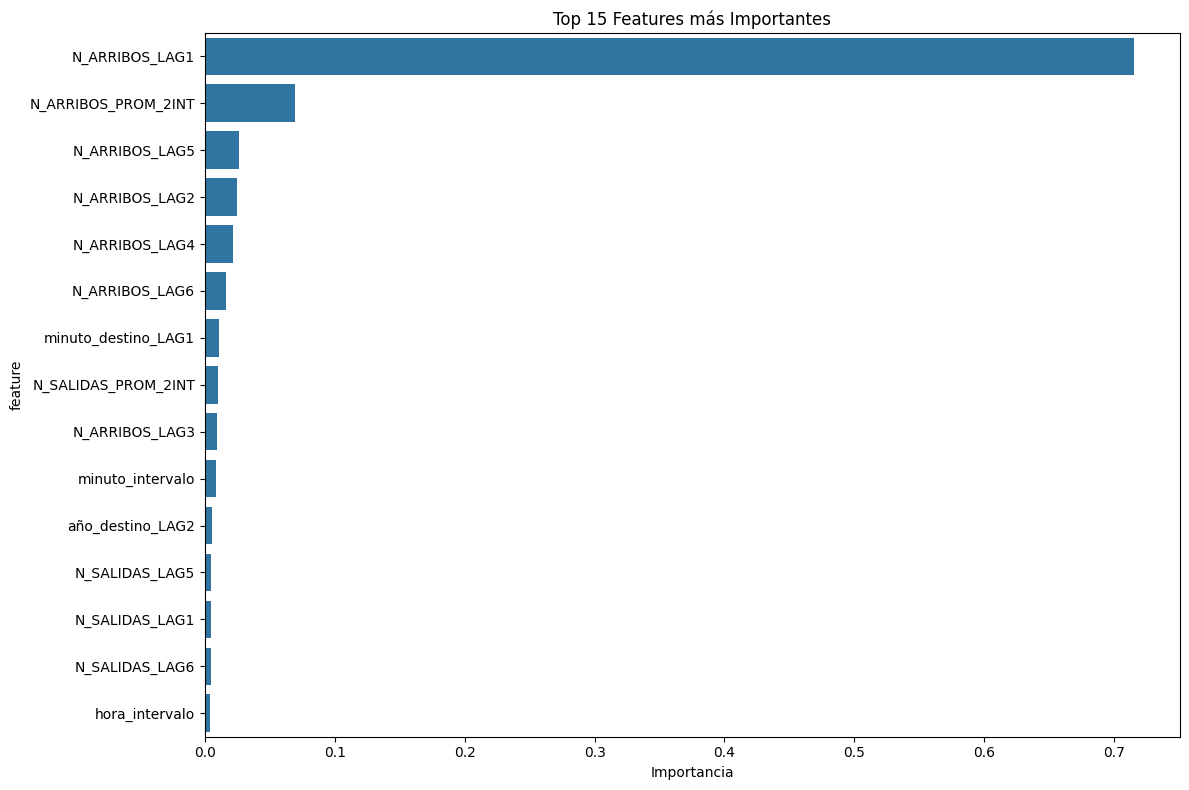


🎯 Top 10 Features más importantes:
   1. N_ARRIBOS_LAG1: 0.7150
   2. N_ARRIBOS_PROM_2INT: 0.0696
   3. N_ARRIBOS_LAG5: 0.0262
   4. N_ARRIBOS_LAG2: 0.0249
   5. N_ARRIBOS_LAG4: 0.0219
   6. N_ARRIBOS_LAG6: 0.0164
   7. minuto_destino_LAG1: 0.0110
   8. N_SALIDAS_PROM_2INT: 0.0098
   9. N_ARRIBOS_LAG3: 0.0095
  10. minuto_intervalo: 0.0084

📈 Graficando predicciones vs valores reales...


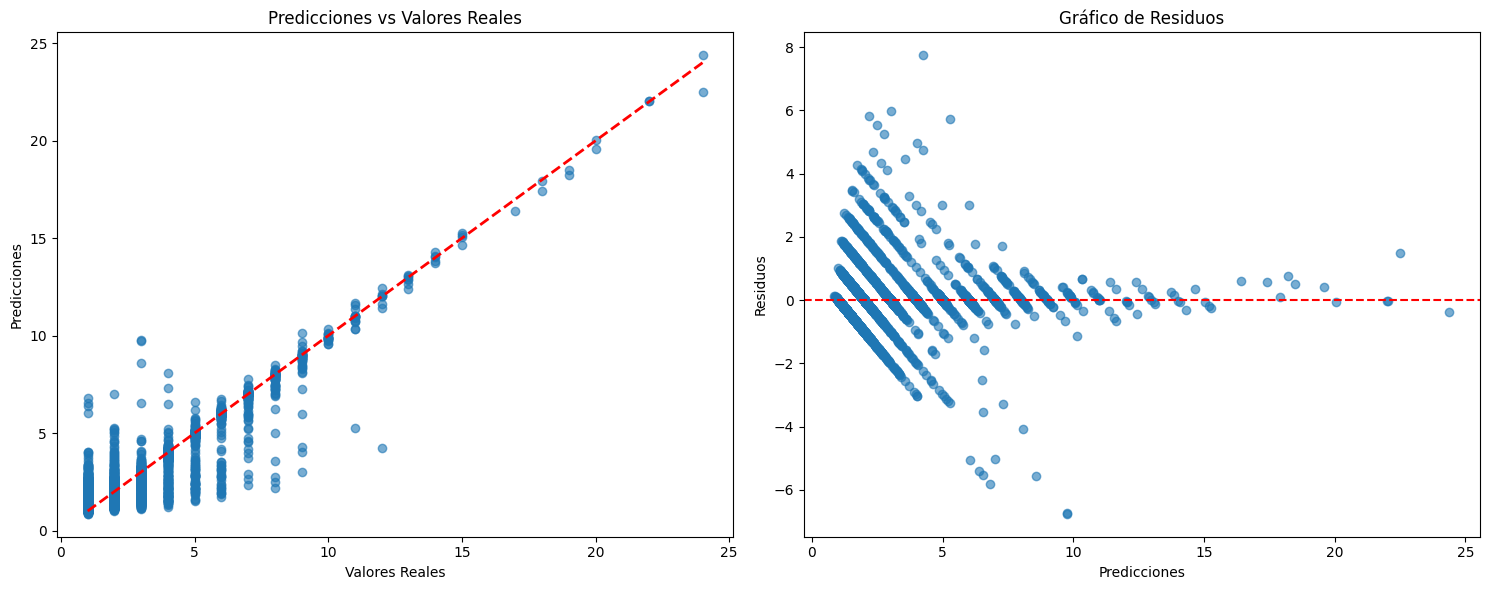

In [16]:
# Visualizar resultados
print("=== 📊 ANÁLISIS DE RESULTADOS ===")

# Mostrar importancia de features
print("🔍 Analizando importancia de features...")
feature_importance = predictor.plot_feature_importance(top_n=15)

print("\n🎯 Top 10 Features más importantes:")
for i, (idx, row) in enumerate(feature_importance.head(10).iterrows()):
    print(f"  {i+1:2d}. {row['feature']}: {row['importance']:.4f}")

# Visualizar predicciones
print("\n📈 Graficando predicciones vs valores reales...")
predictor.plot_predictions(y_test, y_pred, sample_size=5000)


In [17]:
# Resumen final
print("=== 🎉 RESUMEN FINAL DEL ENTRENAMIENTO ===")
print(f"🎯 Modelo: XGBoost para predicción de arribos de bicicletas")
print(f"📊 Dataset: {X.shape[0]:,} recorridos con {X.shape[1]} features")
print(f"🏋️ Entrenamiento: {X_train.shape[0]:,} samples")
print(f"🧪 Prueba: {X_test.shape[0]:,} samples")
print(f"🚀 GPU: {'Habilitada' if predictor.use_gpu else 'No disponible'}")
print(f"💾 Modelo guardado en: models/xgboost_bicis_model.pkl")

print(f"\n📈 Rendimiento final:")
for metric, value in metrics.items():
    if metric == 'R2':
        quality = "Excelente" if value > 0.9 else "Bueno" if value > 0.8 else "Aceptable" if value > 0.6 else "Mejorable"
        print(f"   {metric}: {value:.4f} ({quality})")
    else:
        print(f"   {metric}: {value:.4f}")

print(f"\n✅ ¡ENTRENAMIENTO COMPLETADO EXITOSAMENTE! 🎊")
print(f"🔮 El modelo está listo para hacer predicciones de arribos a estaciones")


=== 🎉 RESUMEN FINAL DEL ENTRENAMIENTO ===
🎯 Modelo: XGBoost para predicción de arribos de bicicletas
📊 Dataset: 12,785,807 recorridos con 68 features
🏋️ Entrenamiento: 10,228,645 samples
🧪 Prueba: 2,557,162 samples
🚀 GPU: Habilitada
💾 Modelo guardado en: models/xgboost_bicis_model.pkl

📈 Rendimiento final:
   MAE: 0.4698
   MSE: 0.6918
   RMSE: 0.8318
   R2: 0.8435 (Bueno)

✅ ¡ENTRENAMIENTO COMPLETADO EXITOSAMENTE! 🎊
🔮 El modelo está listo para hacer predicciones de arribos a estaciones
